<a href="https://colab.research.google.com/github/carlosQuin964/TalentoTech_CarlosQ/blob/main/ComponentesPrinciaples(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA


In [9]:

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mall Customers.xlsx', engine='openpyxl')

print(df.head())

   CustomerID Gender  Age   Education  Marital Status  Annual Income (k$)  \
0           1      M   19  High School        Married                  15   
1           2      M   21     Graduate         Single                  15   
2           3      F   20     Graduate        Married                  16   
3           4      F   23  High School        Unknown                  16   
4           5      F   31   Uneducated        Married                  17   

   Spending Score (1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40  


In [10]:
df

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [11]:
# Eliminar la columna 'CustomerID'
df = df.drop('CustomerID', axis=1)

# Imprimir las primeras 5 filas del DataFrame (sin la columna eliminada)
print(df.head())

  Gender  Age   Education  Marital Status  Annual Income (k$)  \
0      M   19  High School        Married                  15   
1      M   21     Graduate         Single                  15   
2      F   20     Graduate        Married                  16   
3      F   23  High School        Unknown                  16   
4      F   31   Uneducated        Married                  17   

   Spending Score (1-100)  
0                      39  
1                      81  
2                       6  
3                      77  
4                      40  


              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


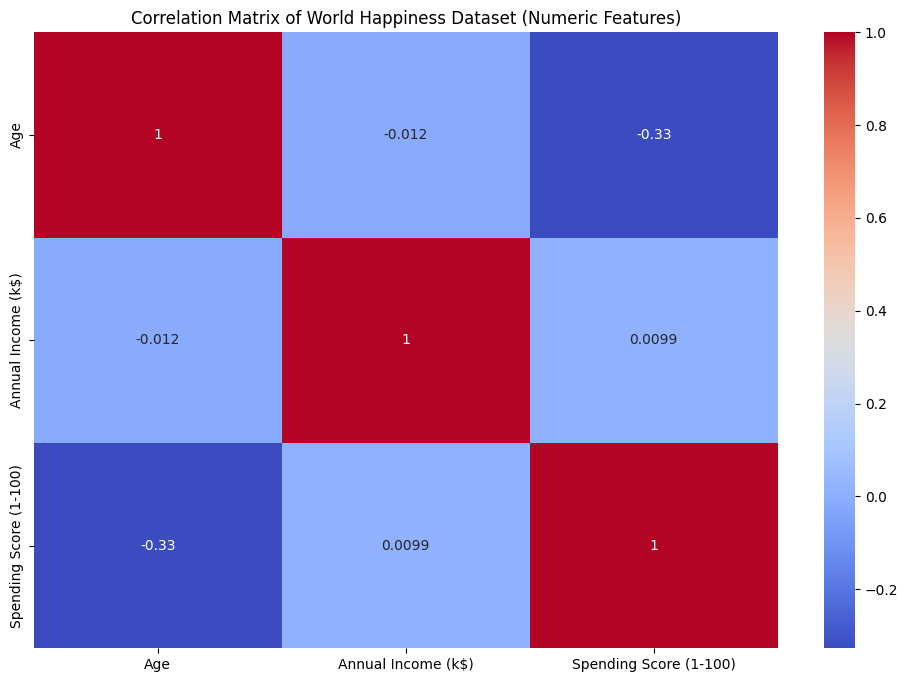

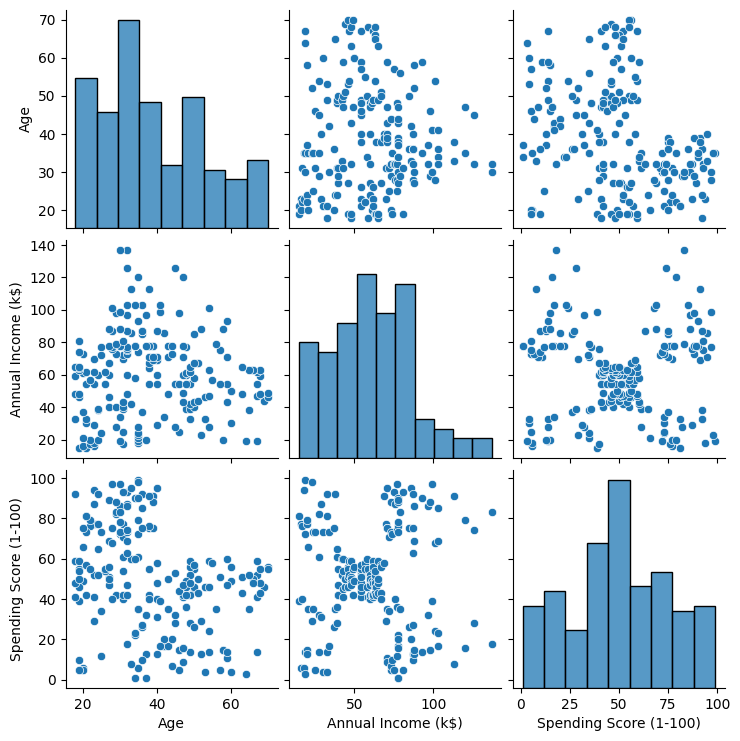

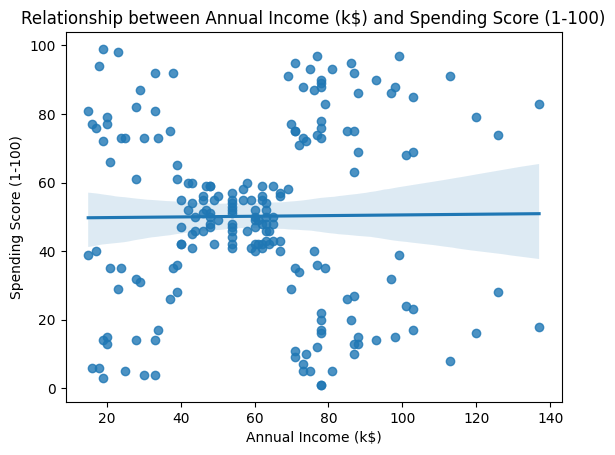

In [12]:
# Seleccionar sólo columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas
print(numeric_df.describe())

# Matriz de correlación para características numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of World Happiness Dataset (Numeric Features)')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)  # Usando df original para contexto
plt.title('Relationship between Annual Income (k$) and Spending Score (1-100)')
plt.show()

               Age  Annual Income (k$)  Spending Score (1-100)  cluster
cluster                                                                
0        50.406250           60.468750               33.343750      0.0
1        32.853659           87.341463               79.975610      1.0
2        25.142857           43.269841               56.507937      2.0


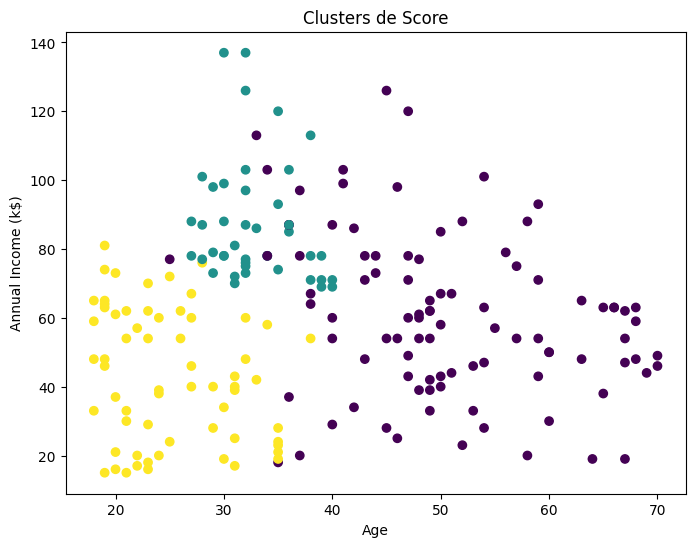

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el clustering
X = df[['Age', 'Annual Income (k$)',  'Spending Score (1-100)']]

# Escalar los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de clusters (puedes ajustar este valor)
n_clusters = 3   #Técnica de codo, método de la  silueta.

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Asignar las etiquetas de cluster a los datos
datosorginal=df
df['cluster'] = kmeans.labels_

# Calculate the mean for only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()  # Select numeric columns for mean calculation

# Mostrar los resultados
print(cluster_means)

# Visualizar los clusters (ejemplo con dos variables)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters de Score')
plt.show()


Análisis del Cluster 0:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  96.000000           96.000000               96.000000     96.0
mean   50.406250           60.468750               33.343750      0.0
std    10.349247           23.704298               17.734788      0.0
min    25.000000           18.000000                1.000000      0.0
25%    43.000000           44.000000               15.750000      0.0
50%    49.000000           60.000000               37.500000      0.0
75%    58.250000           77.250000               48.000000      0.0
max    70.000000          126.000000               60.000000      0.0

Distribución de Variables Clave:

Variable: Age
count    96.000000
mean     50.406250
std      10.349247
min      25.000000
25%      43.000000
50%      49.000000
75%      58.250000
max      70.000000
Name: Age, dtype: float64


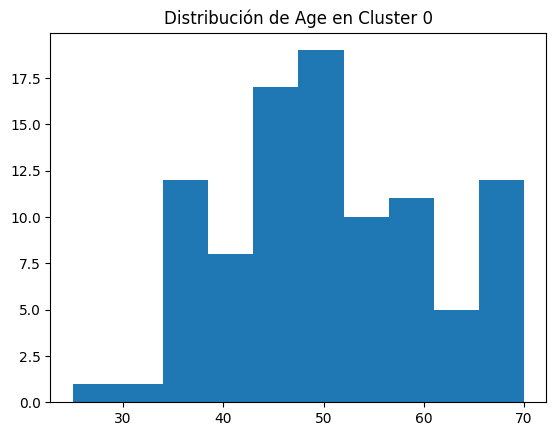


Variable: Annual Income (k$)
count     96.000000
mean      60.468750
std       23.704298
min       18.000000
25%       44.000000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual Income (k$), dtype: float64


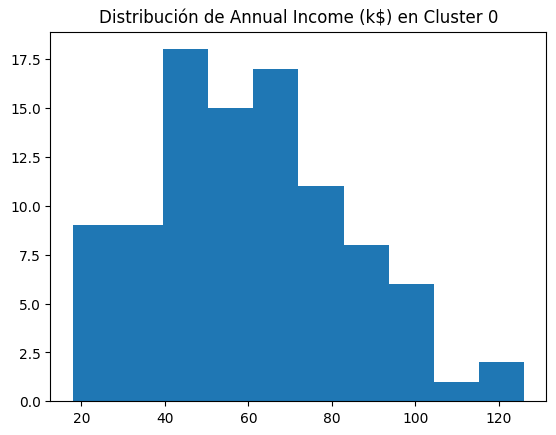


Análisis del Cluster 1:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  41.000000           41.000000               41.000000     41.0
mean   32.853659           87.341463               79.975610      1.0
std     3.811568           17.985563               13.997299      0.0
min    27.000000           69.000000               18.000000      1.0
25%    30.000000           75.000000               74.000000      1.0
50%    32.000000           79.000000               83.000000      1.0
75%    36.000000           97.000000               90.000000      1.0
max    40.000000          137.000000               97.000000      1.0

Distribución de Variables Clave:

Variable: Age
count    41.000000
mean     32.853659
std       3.811568
min      27.000000
25%      30.000000
50%      32.000000
75%      36.000000
max      40.000000
Name: Age, dtype: float64


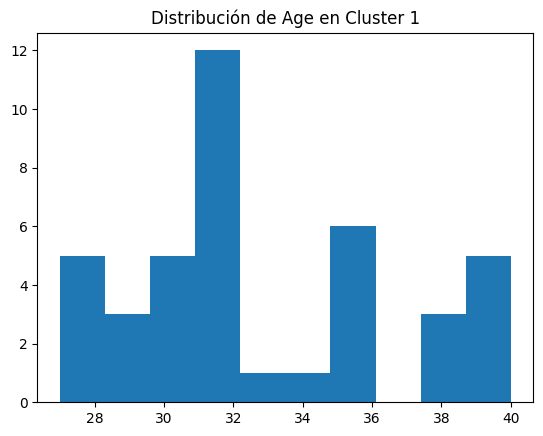


Variable: Annual Income (k$)
count     41.000000
mean      87.341463
std       17.985563
min       69.000000
25%       75.000000
50%       79.000000
75%       97.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


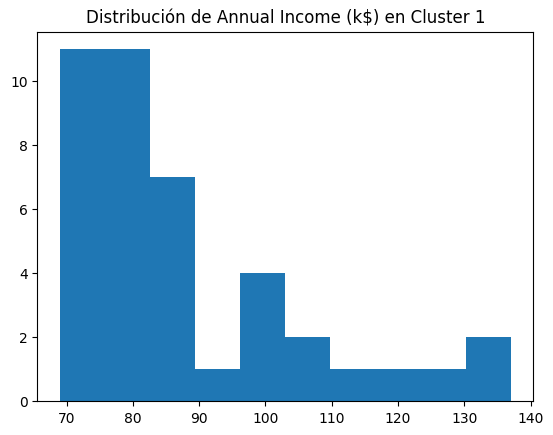


Análisis del Cluster 2:

Estadísticas Descriptivas:
             Age  Annual Income (k$)  Spending Score (1-100)  cluster
count  63.000000           63.000000               63.000000     63.0
mean   25.142857           43.269841               56.507937      2.0
std     5.599128           19.141415               21.572737      0.0
min    18.000000           15.000000                5.000000      2.0
25%    20.000000           24.500000               42.000000      2.0
50%    24.000000           42.000000               55.000000      2.0
75%    30.000000           60.000000               73.000000      2.0
max    38.000000           81.000000               99.000000      2.0

Distribución de Variables Clave:

Variable: Age
count    63.000000
mean     25.142857
std       5.599128
min      18.000000
25%      20.000000
50%      24.000000
75%      30.000000
max      38.000000
Name: Age, dtype: float64


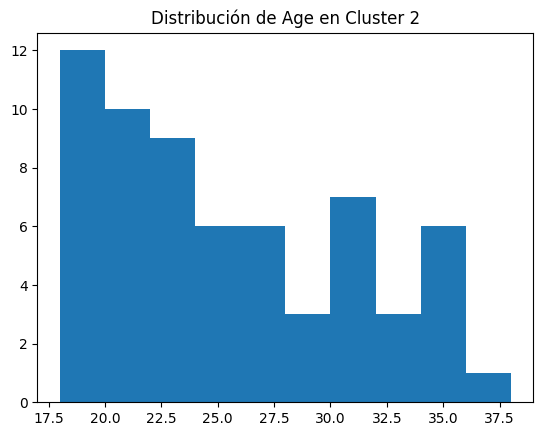


Variable: Annual Income (k$)
count    63.000000
mean     43.269841
std      19.141415
min      15.000000
25%      24.500000
50%      42.000000
75%      60.000000
max      81.000000
Name: Annual Income (k$), dtype: float64


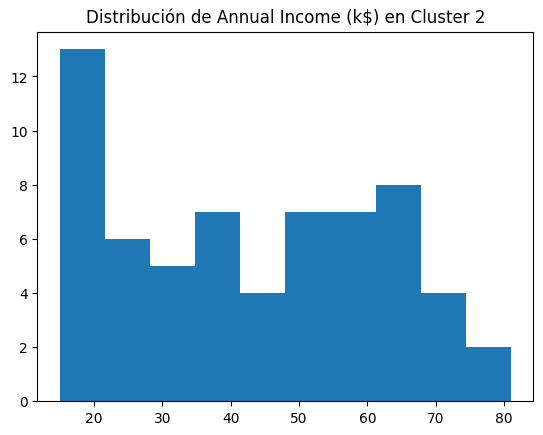

In [14]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
  print(f"\nAnálisis del Cluster {cluster_num}:")
  cluster_data = df[df['cluster'] == cluster_num]

  # Estadísticas descriptivas para variables numéricas
  print("\nEstadísticas Descriptivas:")
  print(cluster_data.describe())

  # Distribución de variables clave (ejemplo: GDP per capita, Social support)
  print("\nDistribución de Variables Clave:")
  for col in ['Age', 'Annual Income (k$)']:
    print(f"\nVariable: {col}")
    print(cluster_data[col].describe())
    # Puedes agregar un histograma para visualizar la distribución
    plt.hist(cluster_data[col], bins=10)
    plt.title(f"Distribución de {col} en Cluster {cluster_num}")
    plt.show()

  # # Analizar la distribución de países en cada cluster
  # print("\nPaíses en el Cluster:")
  # print(cluster_data['Country or region'].value_counts())

In [15]:
#Analisis de componentes

# Gráficos
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [16]:
# Entrenamiento modelo PCA con escalado de los datos
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_numeric)  # Fit on numeric data only

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [17]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
num_pcs = modelo_pca.n_components_ # Get the actual number of components
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_numeric.columns, # Use columns for numeric data only
    index   = [f'PC{i+1}' for i in range(num_pcs)] # Dynamically create index
)

,Age,Annual Income (k$),Spending Score (1-100),cluster
PC1,-0.605514,-0.127861,0.441536,0.649654
PC2,-0.140198,0.954133,0.241816,-0.107235
PC3,0.457058,-0.169989,0.852771,-0.187037
PC4,0.636235,0.210678,-0.139112,0.729018


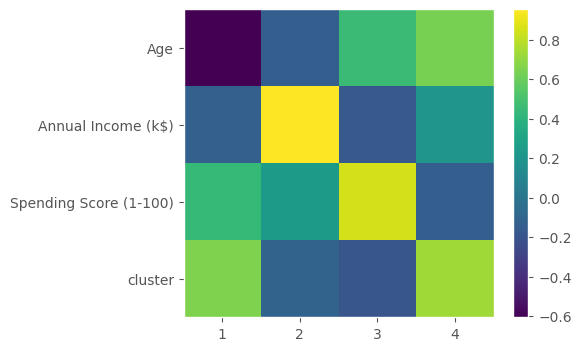

In [18]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_numeric.columns)), X_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.52571389 0.25769546 0.1811777  0.03541295]


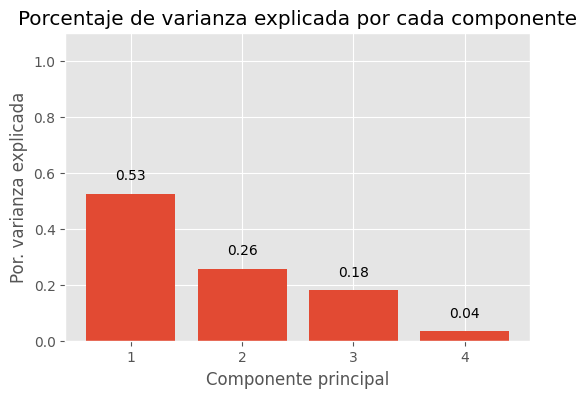

In [19]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

*************************************
Porcentaje de varianza explicada acumulada
****************************************
[0.52571389 0.78340935 0.96458705 1.        ]


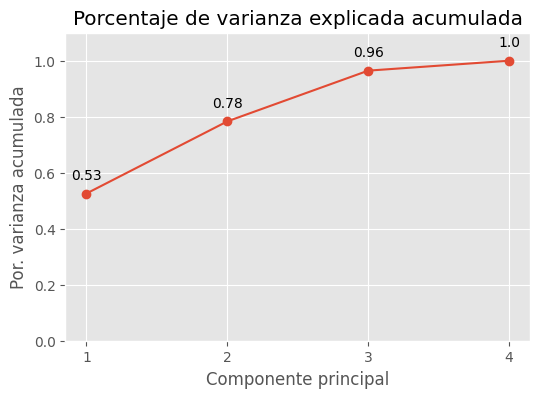

In [20]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('*************************************')
print('Porcentaje de varianza explicada acumulada')
print('****************************************')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');